<a href="https://colab.research.google.com/github/favedgreat/Data-Science/blob/main/Telco_Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip '/content/Telco Customer Churn Data.zip'

Archive:  /content/Telco Customer Churn Data.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
telco_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **DATA ANALYSIS AND EXPLORATION**

In [4]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking statistical description
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
# Converting TotalCharges from object to numeric type
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')

# Checking null values
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The above shows the presence of null values in column 'TotalCharges' which needs to be dropped.


In [10]:
# Checking the shape of the dataset
telco_df.shape

(7043, 21)

In [11]:
# Removing missing/null values
telco_df.dropna(inplace = True)

# Re-checking the shape of the dataset
telco_df.shape

(7032, 21)

In [12]:
# Re-checking null values
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Resetting the index after the drop operation
telco_df = telco_df.reset_index(drop = True)

# Removing customerIDs
df = telco_df.iloc[:,1:]

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Most of the cells are either 'Yes' or 'No'.

We can assign unique values (and then)
Replace the categorical values in all object column with Zeros (0) and ones (1).

In [15]:
# Function to print unique column values
def print_unique_column_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [16]:
print_unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Columns with 'No phone service' and 'No internet service' can be replaced with a 'No'. This way, the dataset is better regularised

In [17]:
df.replace('No internet service', 'No', inplace = True)   # Replacing No Internet Service cells with No
df.replace('No phone service', 'No', inplace=True)   # # Replacing No phone Service cells with No

We can convert:

*   the Yes' and Nos to 1s and 0s respectively i.e (Yes, No) = (1, 0)
*   the Female and Male values to a corresponding 1 and 0 i.e (Female, Male) = (1, 0)



In [18]:
# Creating a python list of all columns with yes, no values
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# Replacing Yes and No with 1 and 0
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

# Replacing Female and Male with 1 and 0
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [19]:
# Printing replacements
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
# Encoding of categorical-data-columns
df2 = pd.get_dummies(data = df, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
# Displaying a section of the already-cleaned-data
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1933,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2908,0,0,0,0,52,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
327,1,1,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1806,1,1,0,0,23,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
6767,1,0,0,1,72,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4875,0,1,0,0,8,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
749,1,0,0,0,27,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3009,0,1,1,0,44,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5829,0,0,1,1,53,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5910,0,0,0,0,67,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0


# **DATA VISUALIZATION**

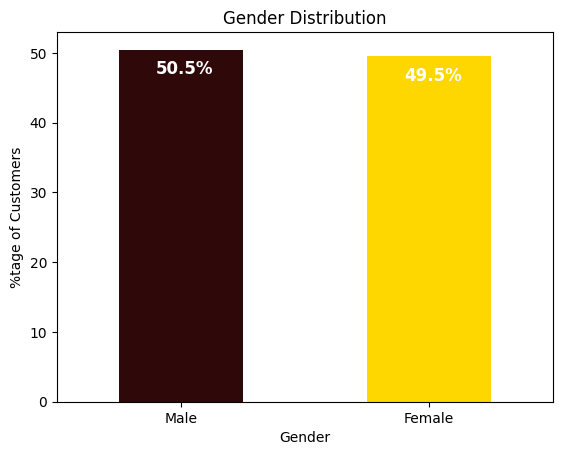

In [22]:
colours = ['#2f0909', '#FFD700']  

ax = (telco_df['gender'].value_counts()*100.0 /len(telco_df)).plot(kind='bar', stacked = True, rot = 0, color = colours)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Printing labels
ax.set_ylabel('%tage of Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + .15, i.get_height() - 3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize = 12,
            color='white',
            weight = 'bold')

In [23]:
churn = df2['Churn'].value_counts()
churn

0    5163
1    1869
Name: Churn, dtype: int64

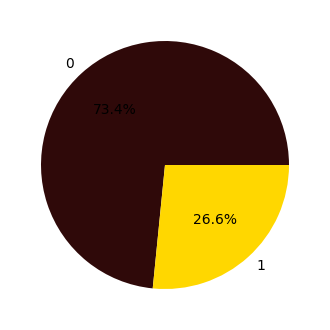

In [25]:
# Creating pie chart for churn column
plt.figure(figsize = (4, 6))
colours = ['#2f0909', '#FFD700']  
plt.pie(churn,colors = colours, labels = churn.index, autopct= '%1.1f%%');

<ipython-input-26-e75bedfc0d05>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telco_df[telco_df['Contract'] == 'Month-to-month']['tenure'],
<ipython-input-26-e75bedfc0d05>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telco_df[telco_df['Contract'] == 'One year']['tenure'],
<ipyt

Text(0.5, 1.0, 'Two Year Contract')

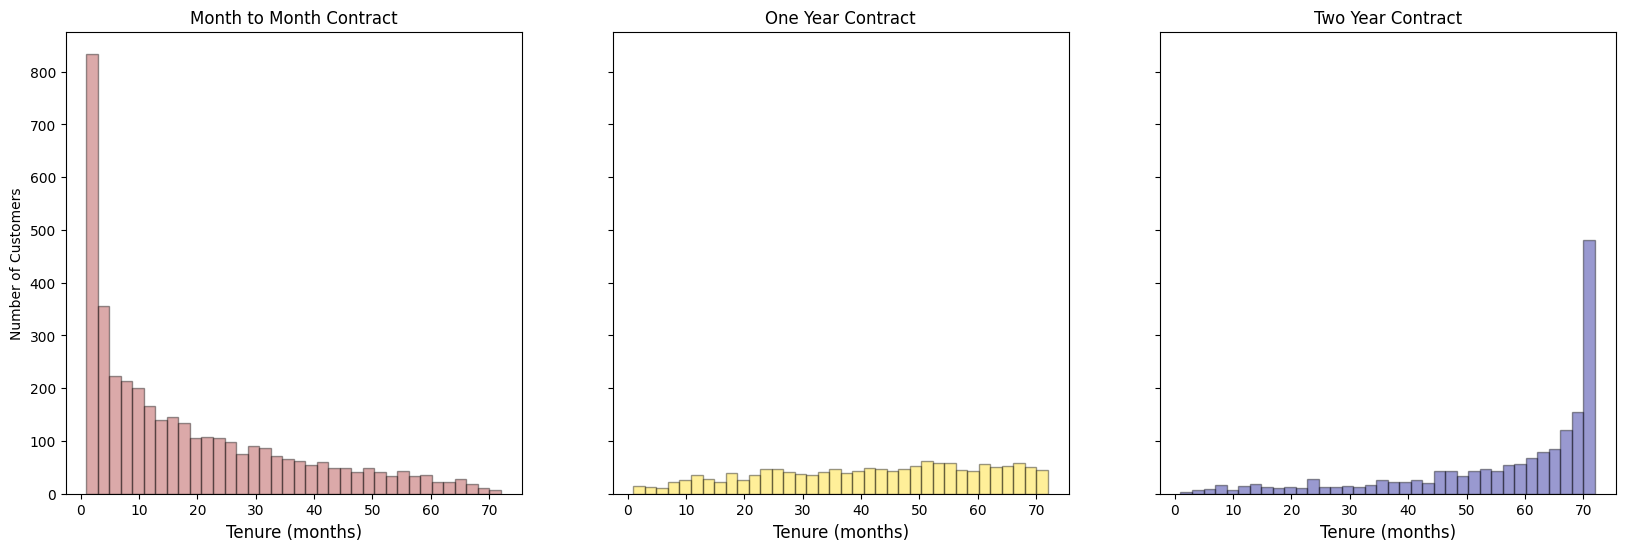

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telco_df[telco_df['Contract'] == 'Month-to-month']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'brown',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)', size = 12)
ax.set_title('Month to Month Contract', size = 12)

ax = sns.distplot(telco_df[telco_df['Contract'] == 'One year']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'gold',
                   hist_kws = {'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax.set_xlabel('Tenure (months)',size = 12)
ax.set_title('One Year Contract',size = 12)

ax = sns.distplot(telco_df[telco_df['Contract'] == 'Two year']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'darkblue',
                   hist_kws = {'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)

ax.set_xlabel('Tenure (months)', size = 12)
ax.set_title('Two Year Contract', size = 12)

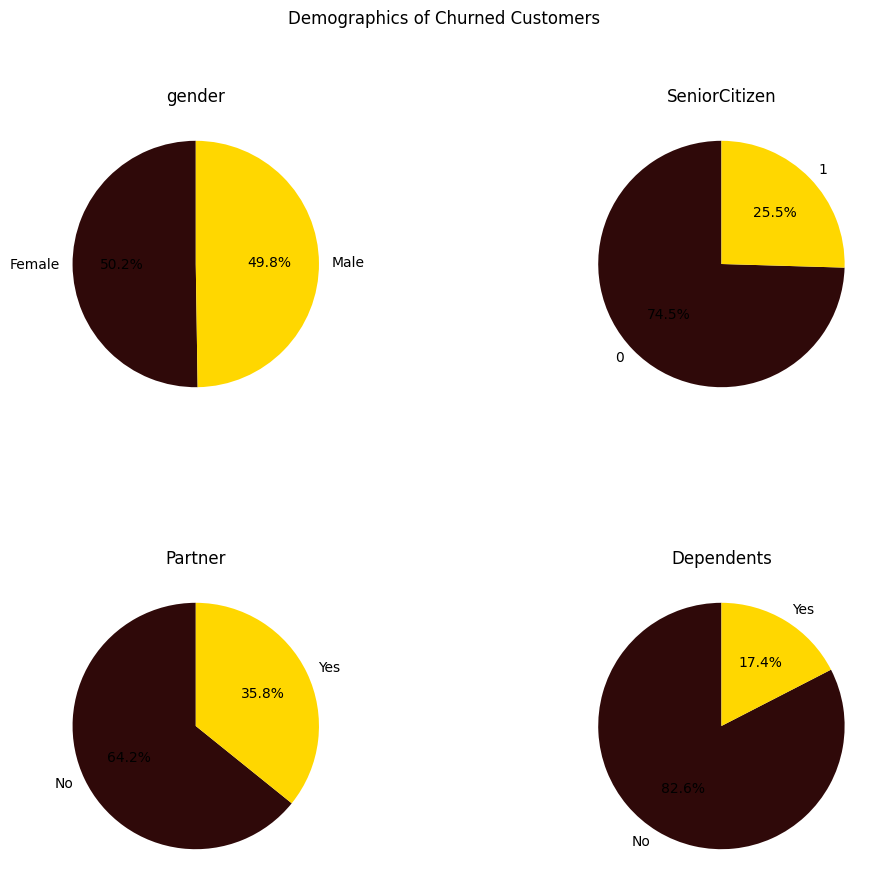

In [38]:
# Define the demographic variables to plot
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop through the demographic variables and create a pie chart for each
for i, var in enumerate(demographic_vars):
    row = i // 2
    col = i % 2
    
    # Group the churned customers by the demographic variable
    demographic_counts = telco_df[telco_df['Churn'] == 'Yes'][var].value_counts()
    
    # Create a pie chart for the variable
    axs[row][col].pie(demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#2f0909', '#FFD700'])
    axs[row][col].set_title(var)  

# Set the title for the entire figure
fig.suptitle('Demographics of Churned Customers')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

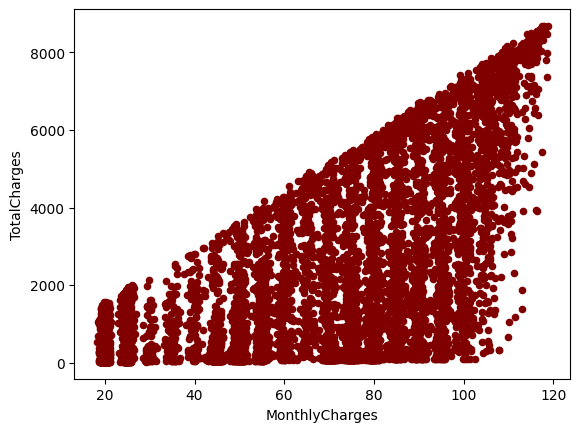

In [32]:
telco_df[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges', y = 'TotalCharges', color = 'maroon')

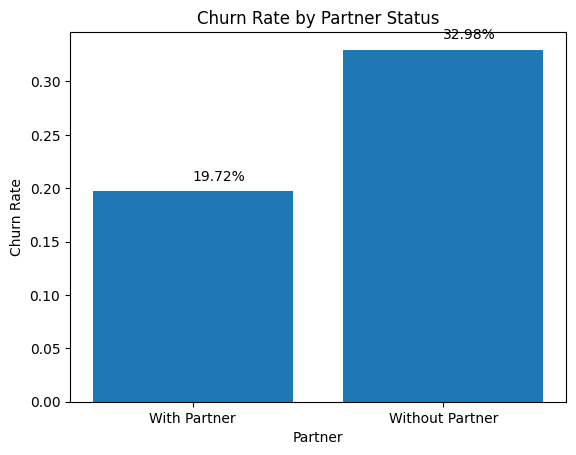

In [37]:
# Calculate the churn rate for customers with partners
with_partner = telco_df[telco_df['Partner'] == 'Yes']
with_partner_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_partner = telco_df[telco_df['Partner'] == 'No']
without_partner_churn_rate = without_partner['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With Partner', 'Without Partner'], [with_partner_churn_rate, without_partner_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Partner Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_partner_churn_rate, without_partner_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()

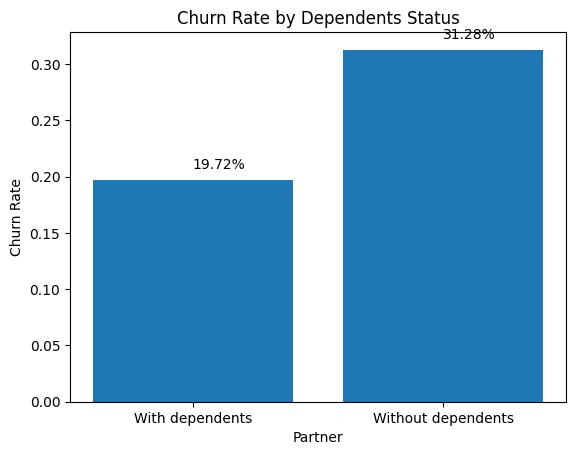

In [39]:
# Calculate the churn rate for customers with partners
with_dependents = telco_df[telco_df['Dependents'] == 'Yes']
with_dependents_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_dependents = telco_df[telco_df['Dependents'] == 'No']
without_dependents_churn_rate = without_dependents['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With dependents', 'Without dependents'], [with_dependents_churn_rate, without_dependents_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Dependents Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_dependents_churn_rate, without_dependents_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()

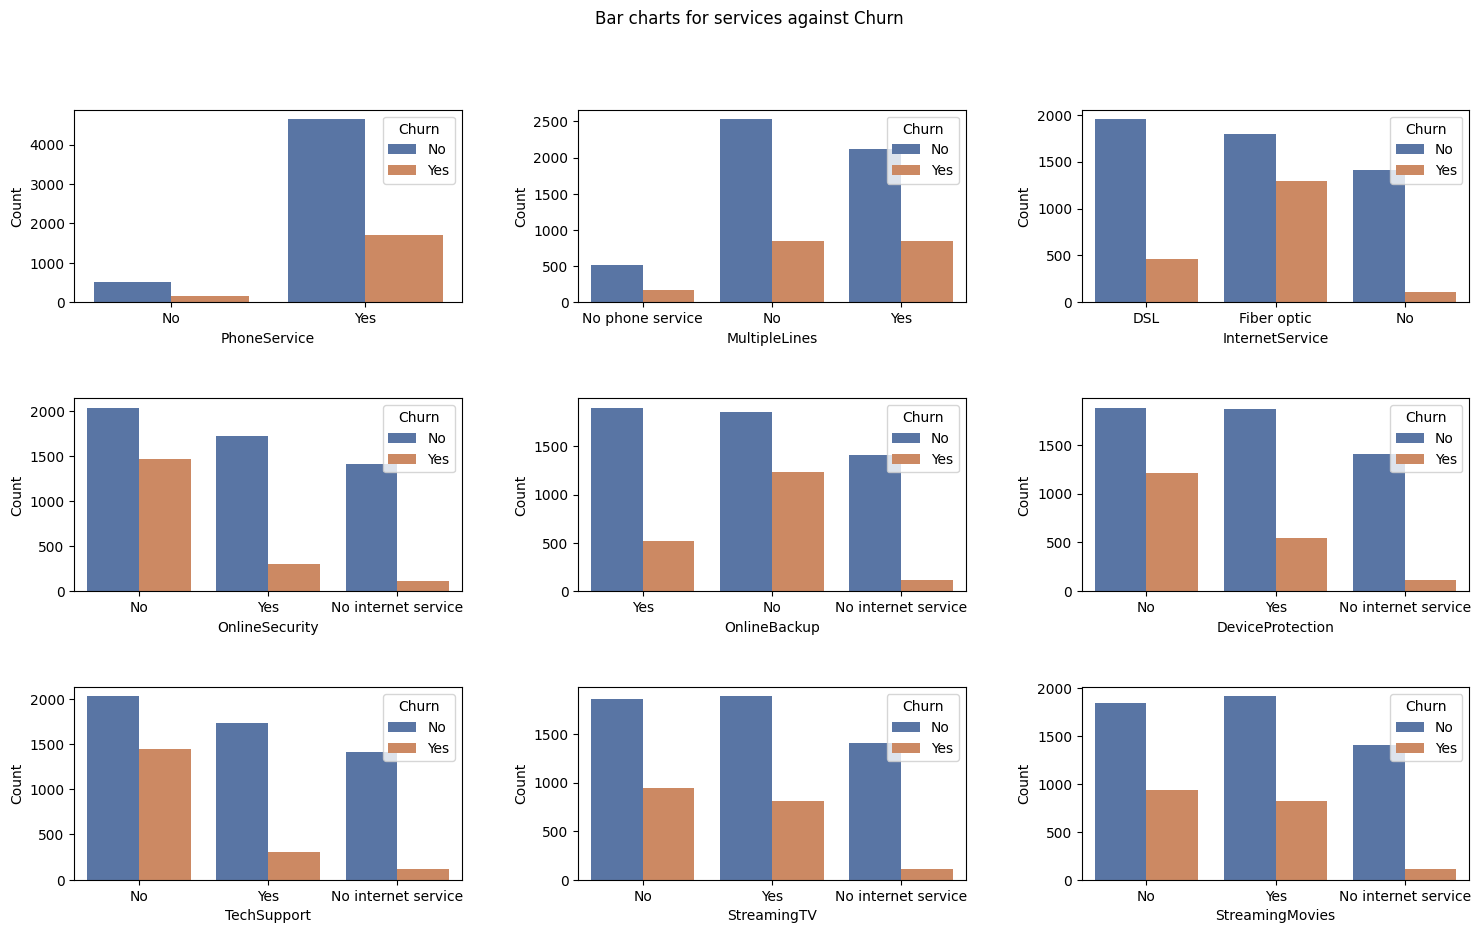

In [40]:
# Define the services to plot
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# Loop through the services and create a bar chart for each
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    # Create a countplot for the service against the Churn column
    sns.countplot(x=service, hue='Churn', data = telco_df, ax=axs[row][col], palette="deep")
    axs[row][col].set_xlabel(service)
    axs[row][col].set_ylabel('Count')
    axs[row][col].legend(title='Churn', loc='upper right')

# Set the title for the entire figure
fig.suptitle('Bar charts for services against Churn')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

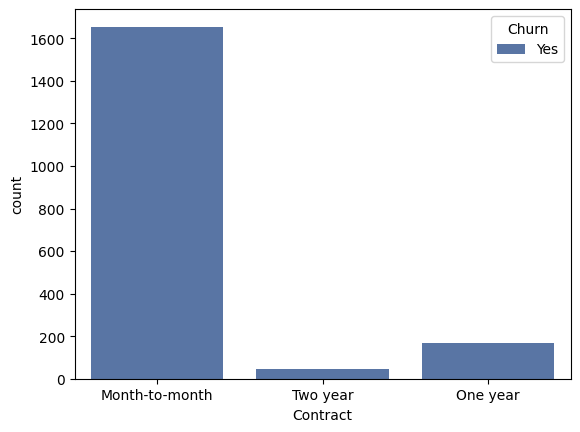

In [42]:
# Create a countplot for the service against the Churn column
sns.countplot(data = telco_df[telco_df['Churn'] == 'Yes'], x= "Contract" , hue='Churn', palette="deep");

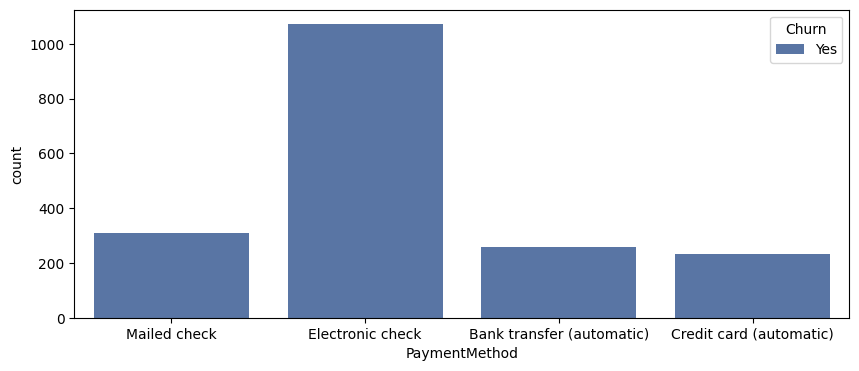

In [43]:
plt.subplots(figsize=(10,4))
sns.countplot(data = telco_df[telco_df['Churn'] == 'Yes'], x = "PaymentMethod", hue = "Churn", palette = "deep");

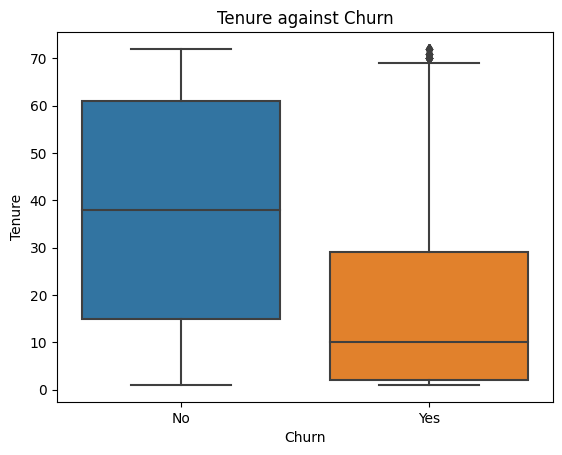

In [44]:
# Create a box plot of a numeric variable across a categorical variable
sns.boxplot(x='Churn', y='tenure', data = telco_df)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure against Churn');

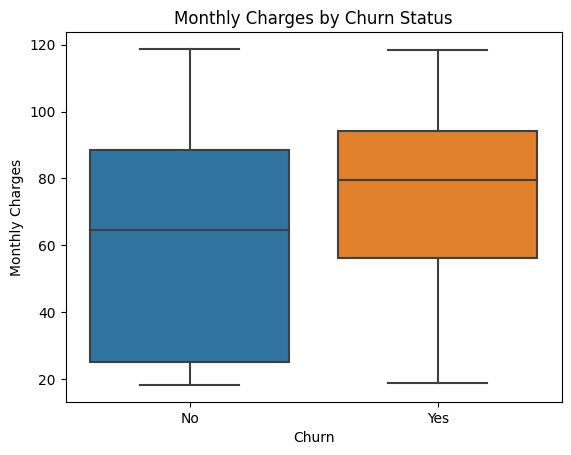

In [45]:
# Create a box plot of monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data = telco_df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')
plt.show()

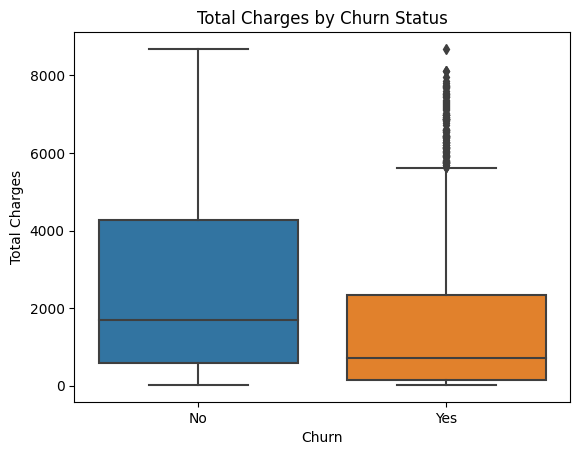

In [46]:
# Create a box plot of Total charges by churn status
sns.boxplot(x='Churn', y='TotalCharges', data = telco_df)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges by Churn Status')
plt.show()

<Axes: >

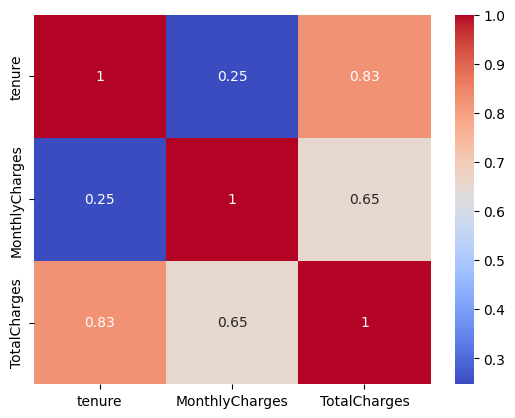

In [47]:
# Select columns for heatmap
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a heatmap using a correlation matrix
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')

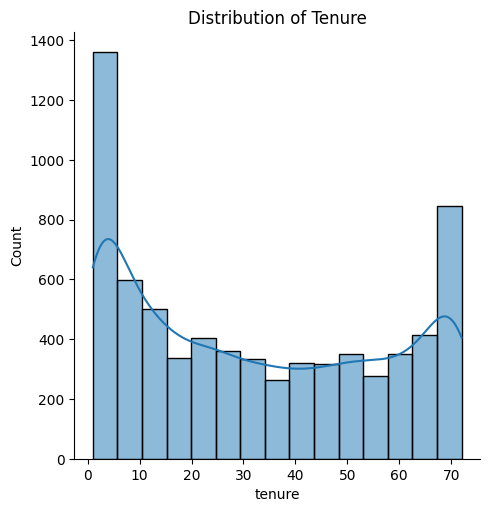

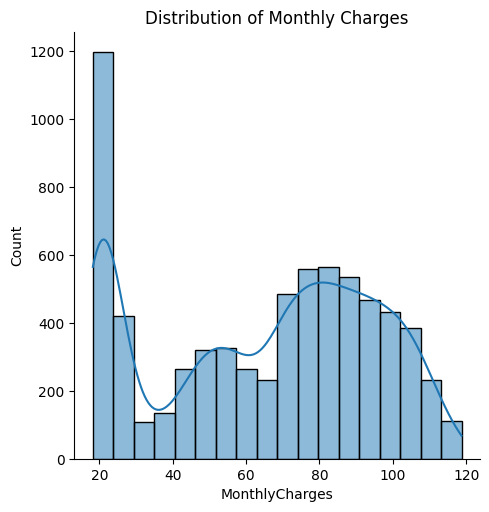

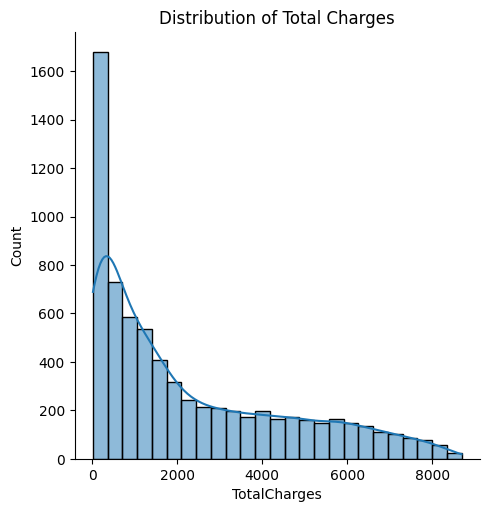

In [50]:
# Create distribution plot for 'tenure'
sns.displot(telco_df['tenure'], kde=True)
plt.title('Distribution of Tenure')

# Create distribution plot for 'MonthlyCharges'
sns.displot(telco_df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

# Create distribution plot for 'TotalCharges'
sns.displot(telco_df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.show()

# **CLASSIFICATION MODEL**

A model will be created using the logistics regression model; we will begin by splitting the data into the train and test category.
This will be done using the already cleaned dataset.

In [51]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [52]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [53]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [54]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [55]:
# Splitting the dataset into the training and testing category
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [57]:
X_train.shape

(5274, 26)

In [58]:
X_test.shape

(1758, 26)

In [59]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3595,1,0,1,1,0.760563,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4260,1,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2919,0,0,0,0,0.140845,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
212,0,0,0,1,0.845070,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5462,1,0,0,0,0.394366,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2466,1,0,1,0,0.732394,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
6992,0,0,0,0,0.352113,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2510,1,0,0,0,0.887324,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
3685,1,0,1,0,0.549296,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
6102,1,0,0,0,0.549296,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [60]:
len(X_train.columns)

26

In [61]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [62]:
from sklearn import metrics

prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8083048919226393


In [ ]:
print (metrics.precision_score(y_test, prediction_test))

In [ ]:
print (metrics.f1_score(y_test, prediction_test))

In [ ]:
print (metrics.recall_score(y_test, prediction_test))

Axes(0.125,0.11;0.775x0.77)


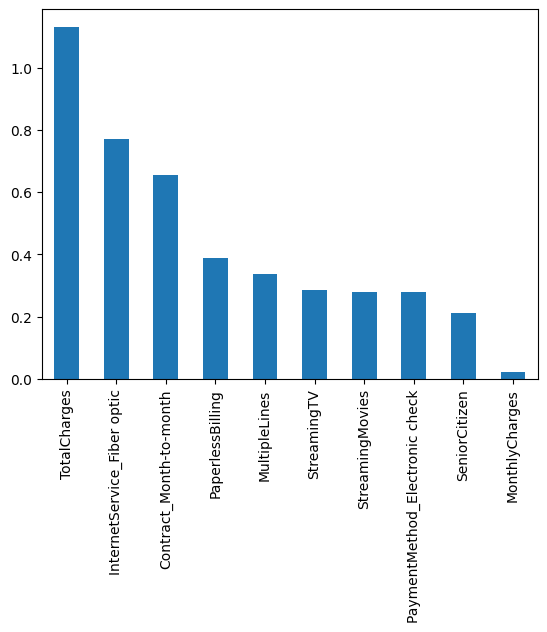

In [63]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index = X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [64]:
# Running the support vector machine model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [71]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [72]:
metrics.f1_score(y_test, preds)

0.6137404580152672

In [73]:
metrics.precision_score(y_test, preds)

0.6931034482758621

In [74]:
metrics.recall_score(y_test, preds)

0.5506849315068493

In [66]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[953  89]
 [164 201]]


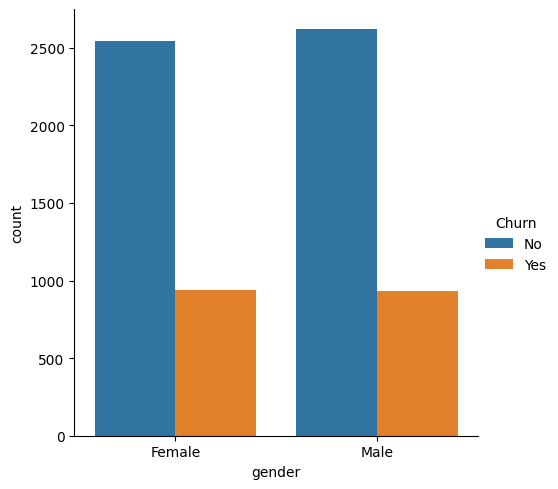

In [68]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telco_df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))